<a href="https://colab.research.google.com/github/mikailachmad/Pengolahan-Citra-Digital/blob/main/PCD_Assignment02_Mikail_Achmad_542370.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import time, sys, os

def warna(teks, kode):
    return f"\033[{kode}m{teks}\033[0m"

def ketik(teks, delay=0.05):
    for huruf in teks:
        sys.stdout.write(huruf)
        sys.stdout.flush()
        time.sleep(delay)
    print()

os.system("cls" if os.name == "nt" else "clear")

judul = """
=========================================
     PENGOLAHAN CITRA DIGITAL
=========================================
"""

print(warna(judul, "95"))

ketik(warna("Nama Lengkap : ", "92") + "Mikail Achmad")
ketik(warna("NIM          : ", "92") + "24/542370/PA/23026")
ketik(warna("Kelas        : ", "92") + "KOM")

print("\n" + "-"*50 + "\n")

ketik(warna("Tugas: The 1st Assignment", "91"), delay=0.05)

menu = {
    "a. Down Sampling": ["Max", "Average", "Median"],
    "b. Up Sampling"  : ["Nearest Neighbor", "Bilinear", "Bicubic"]
}

for kategori, metode in menu.items():
    ketik(warna(kategori, "94"), delay=0.06)
    for m in metode:
        ketik("   ➤ " + warna(m, "98"), delay=0.04)
    print()


     PENGOLAHAN CITRA DIGITAL

Nama Lengkap : Mikail Achmad
NIM          : 24/542370/PA/23026
Kelas        : KOM

--------------------------------------------------

Tugas: The 1st Assignment
a. Down Sampling
   ➤ Max
   ➤ Average
   ➤ Median

b. Up Sampling
   ➤ Nearest Neighbor
   ➤ Bilinear
   ➤ Bicubic



# I. Setting Up Image to be Processed

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

> Import resource yang dibutuhkan, yang meliputi:

*   cv2 -> For Reading Image
*   numpy as np -> For Manipulating Image Matrix
*   matplotlib.pyplot as plt -> For Showing Image

In [6]:
image_1 = "/content/gambar 1.jpg"
read_image_1 = cv2.imread(image_1)
image_1 = cv2.cvtColor(read_image_1, cv2.COLOR_BGR2RGB) # Change the color map since apparently CV2 defaults on BGR and not RGB'

In [7]:
def show(image_1):
  plt.imshow(image_1)

> Helper function to check if image can be processed

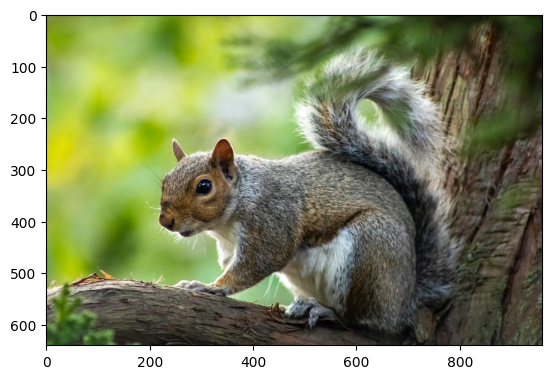

In [8]:
show(image_1)

> Memuat sebuah Gambar Tupai yang saya ambil dari Website Pixabay.

> Citra yang digunakan untuk Downsampling.

> Sumber Gambar: https://pixabay.com/id/photos/tupai-hewan-pengerat-pohon-alam-8211238/

In [9]:
image_2 = ("/content/gambar 2.jpg")
read_image_2 = cv2.imread(image_2)
image_2 = cv2.cvtColor(read_image_2, cv2.COLOR_BGR2RGB)

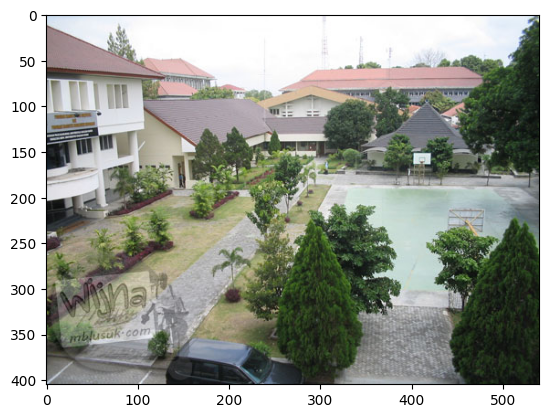

In [10]:
show(image_2)

> Memuat sebuah Gambar Suasana Fakultas Matematika dan Ilmu Pengetahuan Alam Universitas Gadjah Mada 20 tahun yang lalu.

> Citra yang digunakan untuk Upsampling

> Sumber Gambar: https://mblusuk.com/gambar/2016/yogyakarta/f0-suasana-kampus-fmipa-utara-ugm-tahun-2005.jpg

# II. Downsampling

## Using Maximum Method

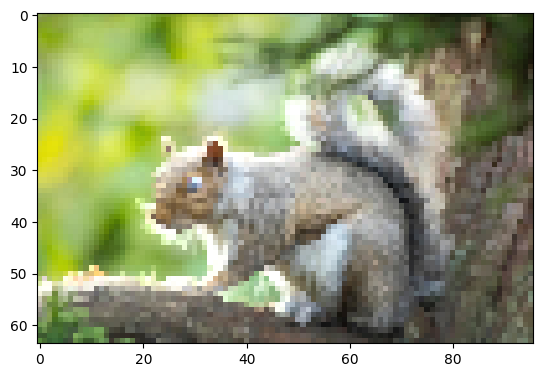

In [11]:
def downsample_max_v2(image_1, factor):
    h, w, c = image_1.shape  # tinggi, lebar, channel
    nh, nw = h // factor, w // factor

    if nh <= 0 or nw <= 0:
        print("Factor terlalu besar, tidak bisa downsample!")
        return None

    result = np.zeros((nh, nw, c), dtype=np.uint8)

    for y in range(nh):
        for x in range(nw):
            y0, y1 = y * factor, min((y + 1) * factor, h)
            x0, x1 = x * factor, min((x + 1) * factor, w)

            blok = image_1[y0:y1, x0:x1]
            result[y, x] = np.max(blok, axis=(0, 1))

    return result

new_img_max = downsample_max_v2(image_1, 10)
show(new_img_max)

> Analisis Metode Maksimum Downsampling

Metode maksimum dalam downsampling memiliki sistem membagi citra ke dalam blok-blok kecil berukuran tertentu, lalu memilih nilai intensitas maksimum dari setiap blok untuk dijadikan representasi piksel baru pada citra hasil. Cara ini membuat citra yang lebih kecil tetap mempertahankan nilai intensitas tertinggi di setiap area, sehingga bagian-bagian dengan kontras tinggi seperti tepi atau daerah terang lebih jelas dipertahankan. Akan tetapi, metode ini juga memiliki kelemahan karena sangat sensitif terhadap satu piksel dengan nilai intensitas tinggi di dalam blok; hal ini bisa menyebabkan hasil akhir menampilkan nilai yang tidak benar-benar mewakili rata-rata kondisi blok tersebut. Oleh karena itu, metode ini lebih sesuai digunakan ketika tujuan utamanya adalah menyoroti fitur-fitur menonjol atau detail penting dalam citra, terutama pada area dengan perbedaan kontras yang kuat.

## Using Average Method

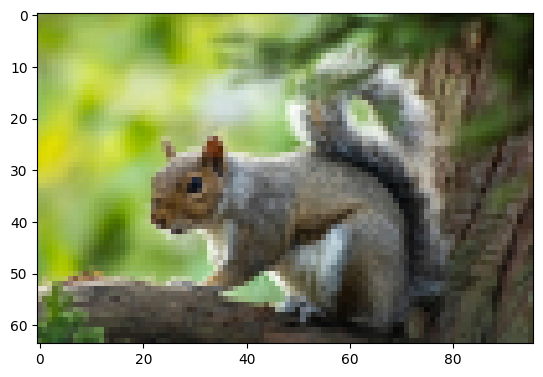

In [12]:
def downsample_avg(image_1, factor):
    h, w, c = image_1.shape
    nh, nw = h // factor, w // factor

    if nh <= 0 or nw <= 0:
        print("Factor terlalu besar, tidak bisa downsample!")
        return None

    result = np.zeros((nh, nw, c), dtype=np.uint8)

    for y in range(nh):
        for x in range(nw):
            y0, y1 = y * factor, min((y + 1) * factor, h)
            x0, x1 = x * factor, min((x + 1) * factor, w)

            blok = image_1[y0:y1, x0:x1]
            result[y, x] = np.average(blok, axis=(0, 1))

    return result

new_img_avg = downsample_avg(image_1, 10)
show(new_img_avg)

> Analisis Metode Average Downsampling

Metode Average Pooling dalam downsampling memproses citra dengan cara membagi gambar ke dalam blok-blok berukuran tertentu, lalu menghitung nilai rata-rata intensitas dari setiap blok untuk menggantikan keseluruhan blok tersebut menjadi satu piksel baru. Pendekatan ini menghasilkan citra yang lebih kecil dengan tampilan lebih halus dan alami, sekaligus membantu mengurangi noise yang mungkin ada pada gambar asli. Namun, efek sampingnya adalah detail-detail halus serta tepi pada citra menjadi kabur karena perbedaan kontras diratakan melalui perhitungan rata-rata. Oleh karena itu, metode ini lebih cocok digunakan ketika tujuan utamanya adalah menyederhanakan citra, tetapi kurang sesuai jika detail dan ketajaman tepi masih  dibutuhkan.

## Using Medium Method

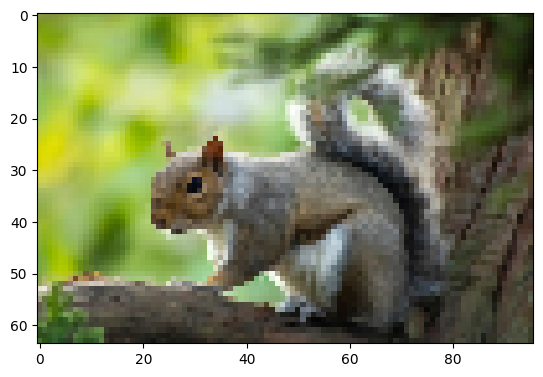

In [13]:
def downsample_medium(image_1, factor):
    h, w, c = image_1.shape
    nh, nw = h // factor, w // factor

    if nh <= 0 or nw <= 0:
        print("Factor terlalu besar, tidak bisa downsample!")
        return None

    result = np.zeros((nh, nw, c), dtype=np.uint8)

    for y in range(nh):
        for x in range(nw):
            y0, y1 = y * factor, min((y + 1) * factor, h)
            x0, x1 = x * factor, min((x + 1) * factor, w)

            blok = image_1[y0:y1, x0:x1]
            result[y, x] = np.median(blok, axis=(0, 1))

    return result

new_img_medium = downsample_medium(image_1, 10)
show(new_img_medium)

> Analisis Metode Medium Downsampling

Metode Median Pooling pada downsampling bekerja dengan cara membagi citra ke dalam blok-blok kecil, lalu mengambil nilai median dari intensitas setiap blok untuk dijadikan piksel representatif pada citra hasil. Metode ini memiliki keunggulan dalam menekan pengaruh outlier atau nilai ekstrem pada blok, sehingga citra yang dihasilkan tidak mudah terdistorsi oleh piksel yang terlalu terang atau terlalu gelap. Selain itu, Median Pooling cenderung lebih mampu mempertahankan tepi dan detail dibandingkan metode rata-rata, sehingga hasil citra tidak terlalu kabur. Namun, kelemahannya adalah biaya komputasi yang lebih tinggi, karena intensitas pada setiap blok harus diurutkan untuk menemukan nilai median. Dengan demikian, metode ini lebih tepat digunakan pada citra yang memiliki banyak noise, karena dapat menghasilkan downsampling yang tetap jelas sekaligus lebih bersih.

# III. Upsampling

## Using Nearest Neighbour Method

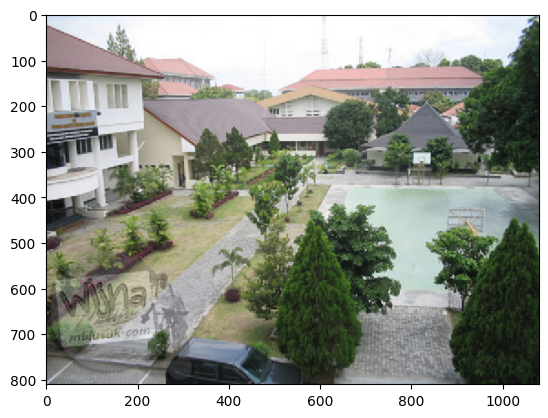

In [14]:
def nearest_neighbor_resize(image_2, scale):
    h, w, c = image_2.shape

    H, W = h * scale, w * scale

    result = np.zeros((H, W, c), dtype=image_2.dtype)

    for y_new in range(H):
        for x_new in range(W):

            y_old = round(y_new / scale)
            x_old = round(x_new / scale)

            y_old = max(0, min(h - 1, y_old))
            x_old = max(0, min(w - 1, x_old))

            result[y_new, x_new] = image_2[y_old, x_old]

    return result

resized_img = nearest_neighbor_resize(image_2, 2)
show(resized_img)

###Analisis Metode Nearest Neighbour
Metode Nearest Neighbor pada upsampling bekerja dengan cara menyalin nilai pixel citra asli yang terdekat ke pixel baru. Keunggulannya ada pada kecepatan dan kemudahan penerapan, serta nilai pixel tetap persis sama dengan citra asal tanpa menghasilkan nilai baru. Namun, kelemahannya adalah citra hasil terlihat berkotak-kotak dan tepi objek menjadi bergerigi, sehingga metode ini kurang cocok untuk citra yang memperlukan detail halus, meskipun masih bekerja dengan baik pada citra biner atau citra berlabel kategori.

## Using Bilinear Method

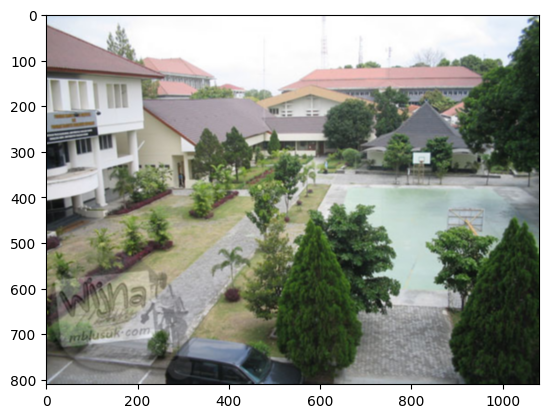

In [15]:
def bilinear_upsample(image_2, scale):

    h, w, ch = image_2.shape
    H, W = h * scale, w * scale

    output = np.zeros((H, W, ch), dtype=image_2.dtype)

    for y_new in range(H):
        for x_new in range(W):

            y_old = y_new / scale
            x_old = x_new / scale

            y0, x0 = int(np.floor(y_old)), int(np.floor(x_old))
            y1, x1 = min(h - 1, y0 + 1), min(w - 1, x0 + 1)

            four_points = [
                image_2[y0, x0],
                image_2[y0, x1],
                image_2[y1, x0],
                image_2[y1, x1]
            ]

            output[y_new, x_new] = np.mean(four_points, axis=0)

    return output

bilinear_img = bilinear_upsample(image_2, 2)
show(bilinear_img)

###Analisis Metode Bilinear

Metode Bilinear pada upsampling memiliki mekanisme yaitu mengambil dan menghitung nilai pixel baru dari rata-rata empat tetangga (4-neighbour) pixel paling dekat. Hasil citra yang diperoleh lebih halus — tanpa mengkompromi kecepatan pemrosesan citra — dibandingkan dengan Nearest Neighbor karena lebih mulus pada transisi antarpixelnya. Meski demikian, metode ini cenderung membuat citra tampak blur dan kehilangan beberapa detail, yang dapat dilihat saat citra yang dipakai bertekstur kental.

## Using Bicubic Method

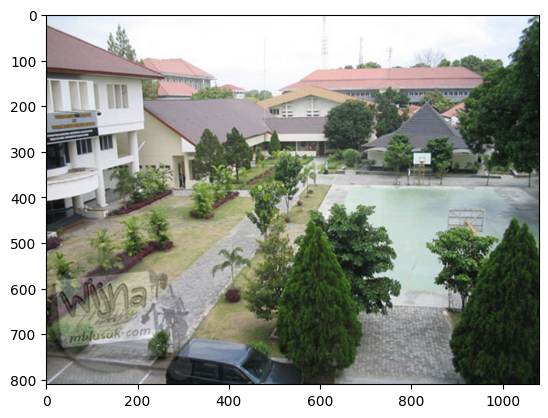

In [16]:
def upsample_bicubic_cv2(image_2, factor):
    h, w = image_2.shape[:2]
    new_h, new_w = h * factor, w * factor

    upscaled = cv2.resize(image_2, (new_w, new_h), interpolation=cv2.INTER_CUBIC)
    return upscaled

bicubic_img = upsample_bicubic_cv2(image_2, 2)
show(bicubic_img)

> Analisis Metode Bicubic
/
Metode Bicubic dalam upsampling menggunakan pendekatan interpolasi yang lebih kompleks dengan mempertimbangkan 16 pixel tetangga terdekat (dalam area 4×4) dan menghitung bobotnya menggunakan fungsi kubik. Dengan pendekatan ini, citra hasil memiliki kualitas yang lebih tinggi dibandingkan Nearest Neighbor maupun Bilinear, karena detail lebih terjaga dan transisi warna lebih natural. Kekurangannya adalah membutuhkan komputasi yang lebih berat serta kadang memunculkan artefak seperti overshoot pada tepi dengan kontras tinggi.